Lets get another dataset to work with; this is data on the Titanic passengers

In [1]:
import pandas as pd
titanic_data=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We're going to join this dataset with another dataset; I'll make up some random "factors" that vary by gender

In [2]:
d = {'gender': ["male", "female"], 'factor': [3, 2]}
gender_factors = pd.DataFrame(data=d)
gender_factors

,gender,factor
0,male,3
1,female,2


Now lets merge them! I'll show you two different ways. Note that the documentation on these is really good, and has a lot of options on how to bring datasets together

In [3]:
pd.merge(titanic_data,gender_factors,how="left", left_on="Sex",right_on="gender")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,factor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,3


Note that if you want to do non-exact joins, check out merge_asof; you can join on nearest, nearest without going over, etc.

Groupby is another incredibly powerful option for how to analyze or summarize data

In [4]:
titanic_data.groupby("Sex").mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


To only look at on field, slice by it

In [5]:
titanic_data.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [6]:
bins=[10,20,30,40,50]
titanic_data['age_bin'] = pd.cut(titanic_data['Age'], bins)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]"


In [7]:
titanic_data.groupby(["Sex","Pclass"])["Survived"].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Apply can be used to apply any function to a dataframe!

In [8]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]"


In [9]:
def gender_based_calc(input_row):
    if input_row["Sex"]=="male":
        answer=0
    else:
        answer=1
    return answer

titanic_data["gender_encoded"]=titanic_data.apply(gender_based_calc,axis=1)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,gender_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]",0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]",1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]",0


[Text(0.5, 0.875, 'gender_encoded <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'Age <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'SibSp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.375, 0.375, 'Pclass <= 1.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(0.3125, 0.125, 'gini = 0.46\nsamples = 120\nvalue = [77, 43]'),
 Text(0.4375, 0.125, 'gini = 0.204\nsamples = 433\nvalue = [383, 50]'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6875, 0.125, 'gini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.875, 0.

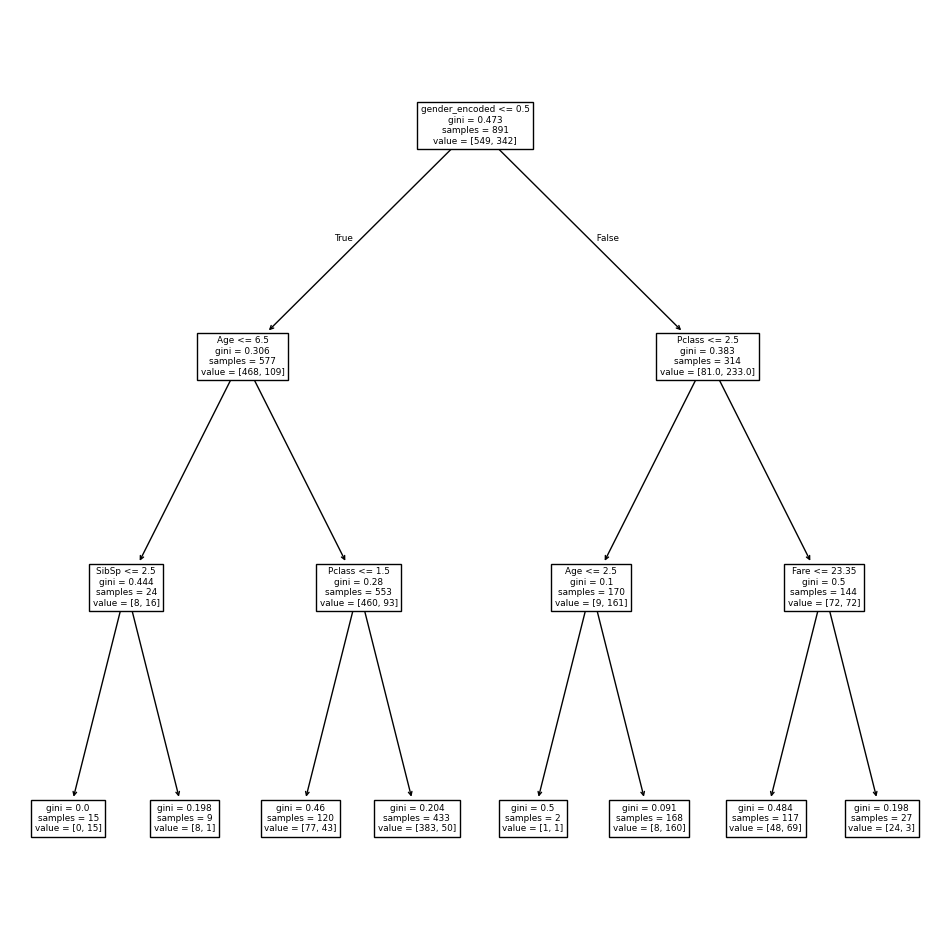

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
classifier = tree.DecisionTreeClassifier(max_depth=3)

X=titanic_data.drop(columns=["Survived","Name","Ticket","Cabin","Embarked","Sex","PassengerId","age_bin"])
y=titanic_data["Survived"]
classifier.fit(X, y)


plt.figure(figsize=(12,12))
tree.plot_tree(classifier,feature_names=X.columns)